In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import kraken as pla
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import os

In [3]:
data_folder='data/CodeluppiosmFISH/'

coordinates = pd.read_csv(os.path.join(data_folder,'coordinates.csv'))
signatures = pd.read_csv(os.path.join(data_folder,'signatures.csv'),index_col=0)
# filenames = ['/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_ImmunePanel.csv',
# '/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_KISS and CGA.csv',
# '/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_PlacentaPanel.csv']

# coord_tables=[]

# for file_coordinates in filenames:
#     coord_tables.append(pd.read_csv(file_coordinates))
    

# coordinates=pd.concat(coord_tables)

# coordinates.gene.replace('HBA1/2','HBA1', inplace=True)
# coordinates.gene.replace('KISS','KISS1', inplace=True)

# coordinates.index = np.arange(coordinates.shape[0])
# coordinates

In [4]:
# adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')
# bg = pla.PixelMap(np.load('bg.npy').T,upscale=0.2)


In [5]:

sdata = pla.SpatialData(coordinates.genes, 
                       coordinates.X, 
                       coordinates.Y,)[::5]

sdata["celltype"] = signatures.index[np.array(signatures).argmax(0)[sdata.gene_ids]]
sdata.celltype = sdata.celltype.astype('category')

In [6]:
sdata

,g,x,y,gene_id,celltype
0,Acta2,1183.976184,1303.381303,0,Vascular Smooth Muscle
5,Acta2,590.395590,2085.332085,0,Vascular Smooth Muscle
10,Acta2,1054.886055,353.210353,0,Vascular Smooth Muscle
15,Acta2,428.415428,2172.757173,0,Vascular Smooth Muscle
20,Acta2,987.870988,514.800515,0,Vascular Smooth Muscle
...,...,...,...,...,...
1802565,Vtn,1881.166881,144.885145,32,Pericytes
1802570,Vtn,1627.861628,1467.116467,32,Pericytes
1802575,Vtn,944.710945,1719.316719,32,Pericytes
1802580,Vtn,1460.876461,1627.666628,32,Pericytes


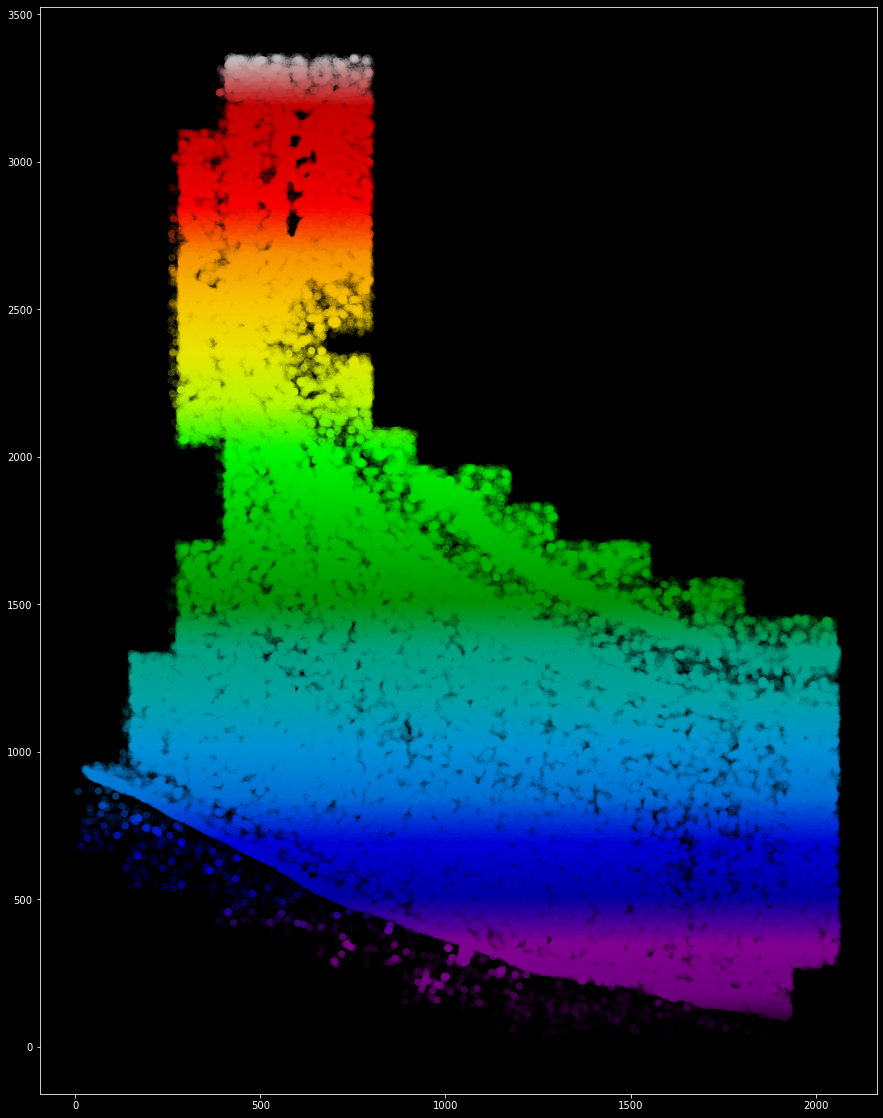

In [7]:
plt.figure(figsize=(15,20))
sdata.scatter(c = sdata.y,cmap="nipy_spectral",alpha=0.1)

In [19]:
sdata.graph.update_knn(n_neighbors=300)
# sdata.graph.run_umap(bandwidth=50,n_neighbors=20)
# sdata.graph.run_tsne()
sdata.graph.run_umap(bandwidth=30,n_neighbors=80)

In [16]:
celltypes = ['Pyramidal Cpne5',
 'Pyramidal L2-3 L5',
 'Pyramidal L4',
 'Pyramidal L6',
 'Pyramidal L5']
celltypes = ['Inhibitory Cnr1',
 'Inhibitory Vip',
 'Inhibitory Crhbp',
 'Inhibitory IC',
 'Inhibitory Kcnip2',
 'Inhibitory CP']
# celltypes = ['C. Plexus']

sdata['colors']=sdata.celltype.astype(str)
sdata.loc[~sdata.colors.isin(celltypes),'colors']='other'
sdata.colors=sdata.colors.astype('category')

<IPython.core.display.Javascript object>


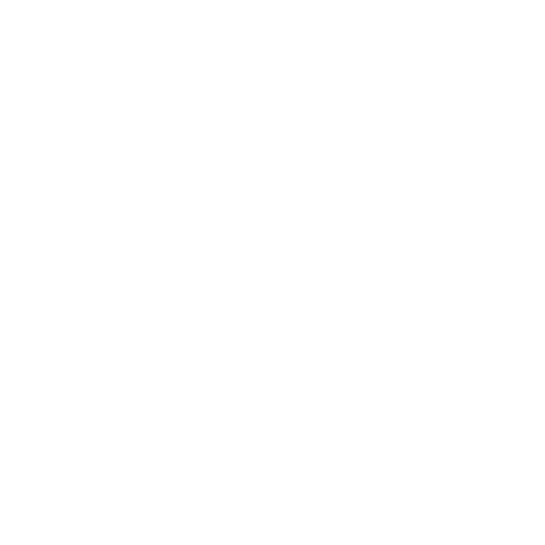

In [17]:
plt.figure(figsize=(5,5))
sdata.graph.plot_umap(alpha=0.01,cmap="jet")

<IPython.core.display.Javascript object>


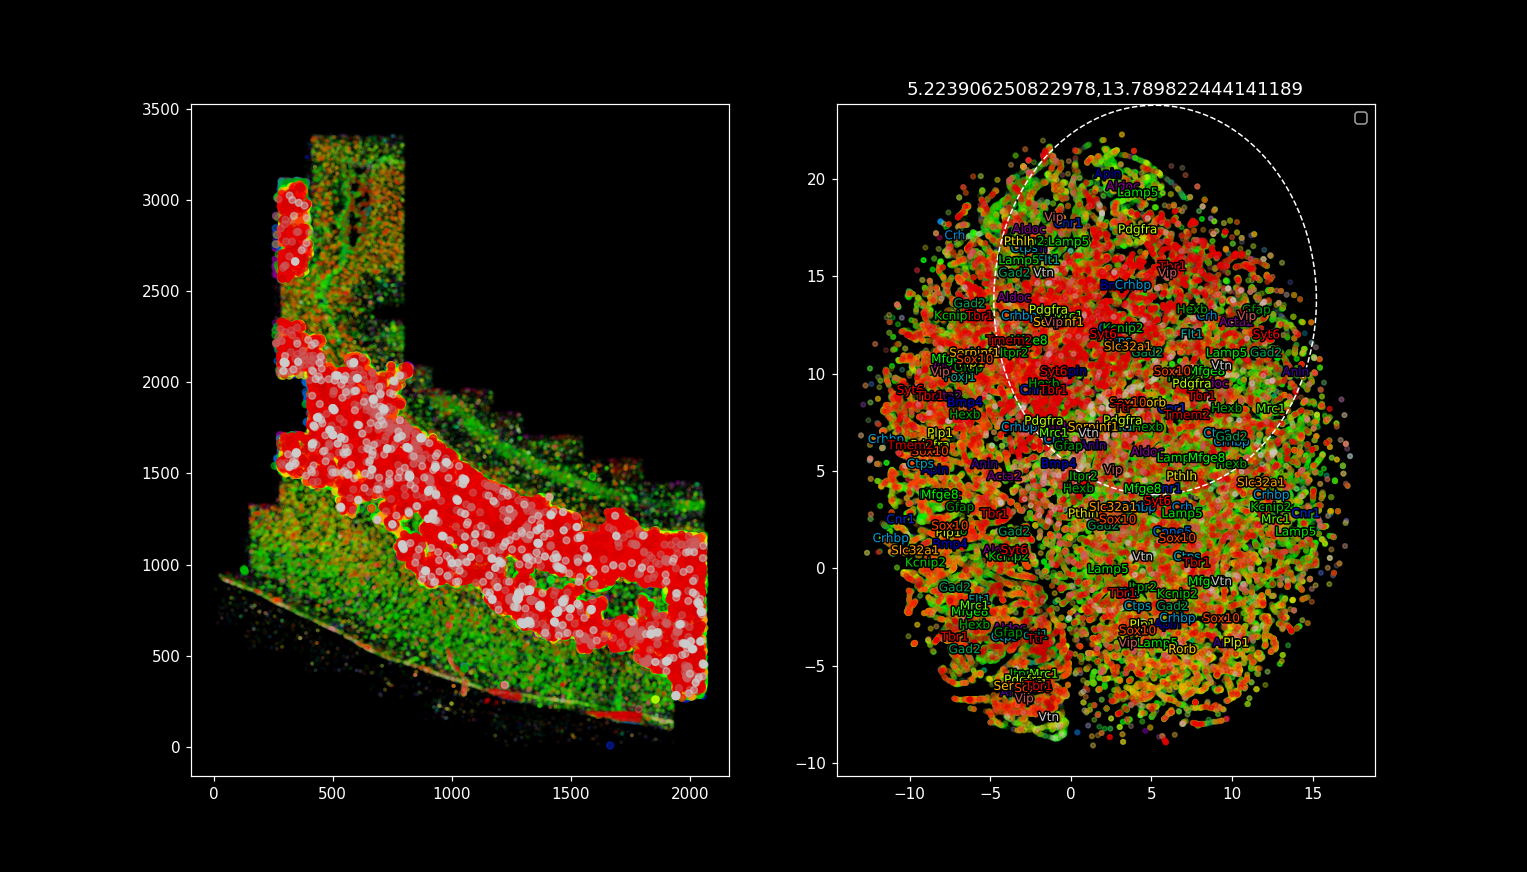

In [18]:
%matplotlib notebook

from matplotlib.backend_bases import MouseButton

click_coords=np.array((0.0,0.0))

plt.style.use('dark_background')

fig = plt.figure(figsize=(14,8))

radius=10
colors = np.repeat([(0,1,0,1)],len(sdata),axis=0)

ax1=plt.subplot(121)
sdata[:0].scatter(alpha=0.9,cmap='autumn',marker='x', axd=ax1)
sc1 = ax1.scatter(*sdata.coordinates,c=sdata.props.project('c_genes'),marker='x',alpha=0.05,s=[0]*len(sdata))
sc2 = ax1.scatter(*sdata.coordinates,c=sdata.props.project('c_genes'),marker='o',alpha=0.5,s=[10]*len(sdata))

ax2=plt.subplot(122)
sdata.graph.plot_umap(color_prop='genes', text_prop='genes', 
                         text_color_prop='genes', alpha=0.1, text_distance=0.2,marker='.',)

circle=plt.Circle((0,0),radius, color='w',fill=False, linestyle='--')
ax2.add_artist(circle)

def on_click(event):
    click_coords[0]=event.xdata
    click_coords[1]=event.ydata
    
def on_release(event):
    center = np.array((event.xdata,event.ydata))
    if all(click_coords==center):
        ax2.set_title(f'{event.xdata},{event.ydata}')
        circle.set_center(center)
        
        dist = ((sdata.graph.umap-center)**2).sum(1)**0.5
        
        
        circle.radius=radius
        sc1._sizes[dist<radius]=0
        sc1._sizes[dist>radius]=3
        
        sc2._sizes[dist<radius]=20
        sc2._sizes[dist>radius]=0
                
        fig.canvas.draw()
        
        
           
plt.connect('button_press_event', on_click)
plt.connect('button_release_event', on_release)
    
plt.legend([],[])

In [14]:
radius=4
 

<IPython.core.display.Javascript object>


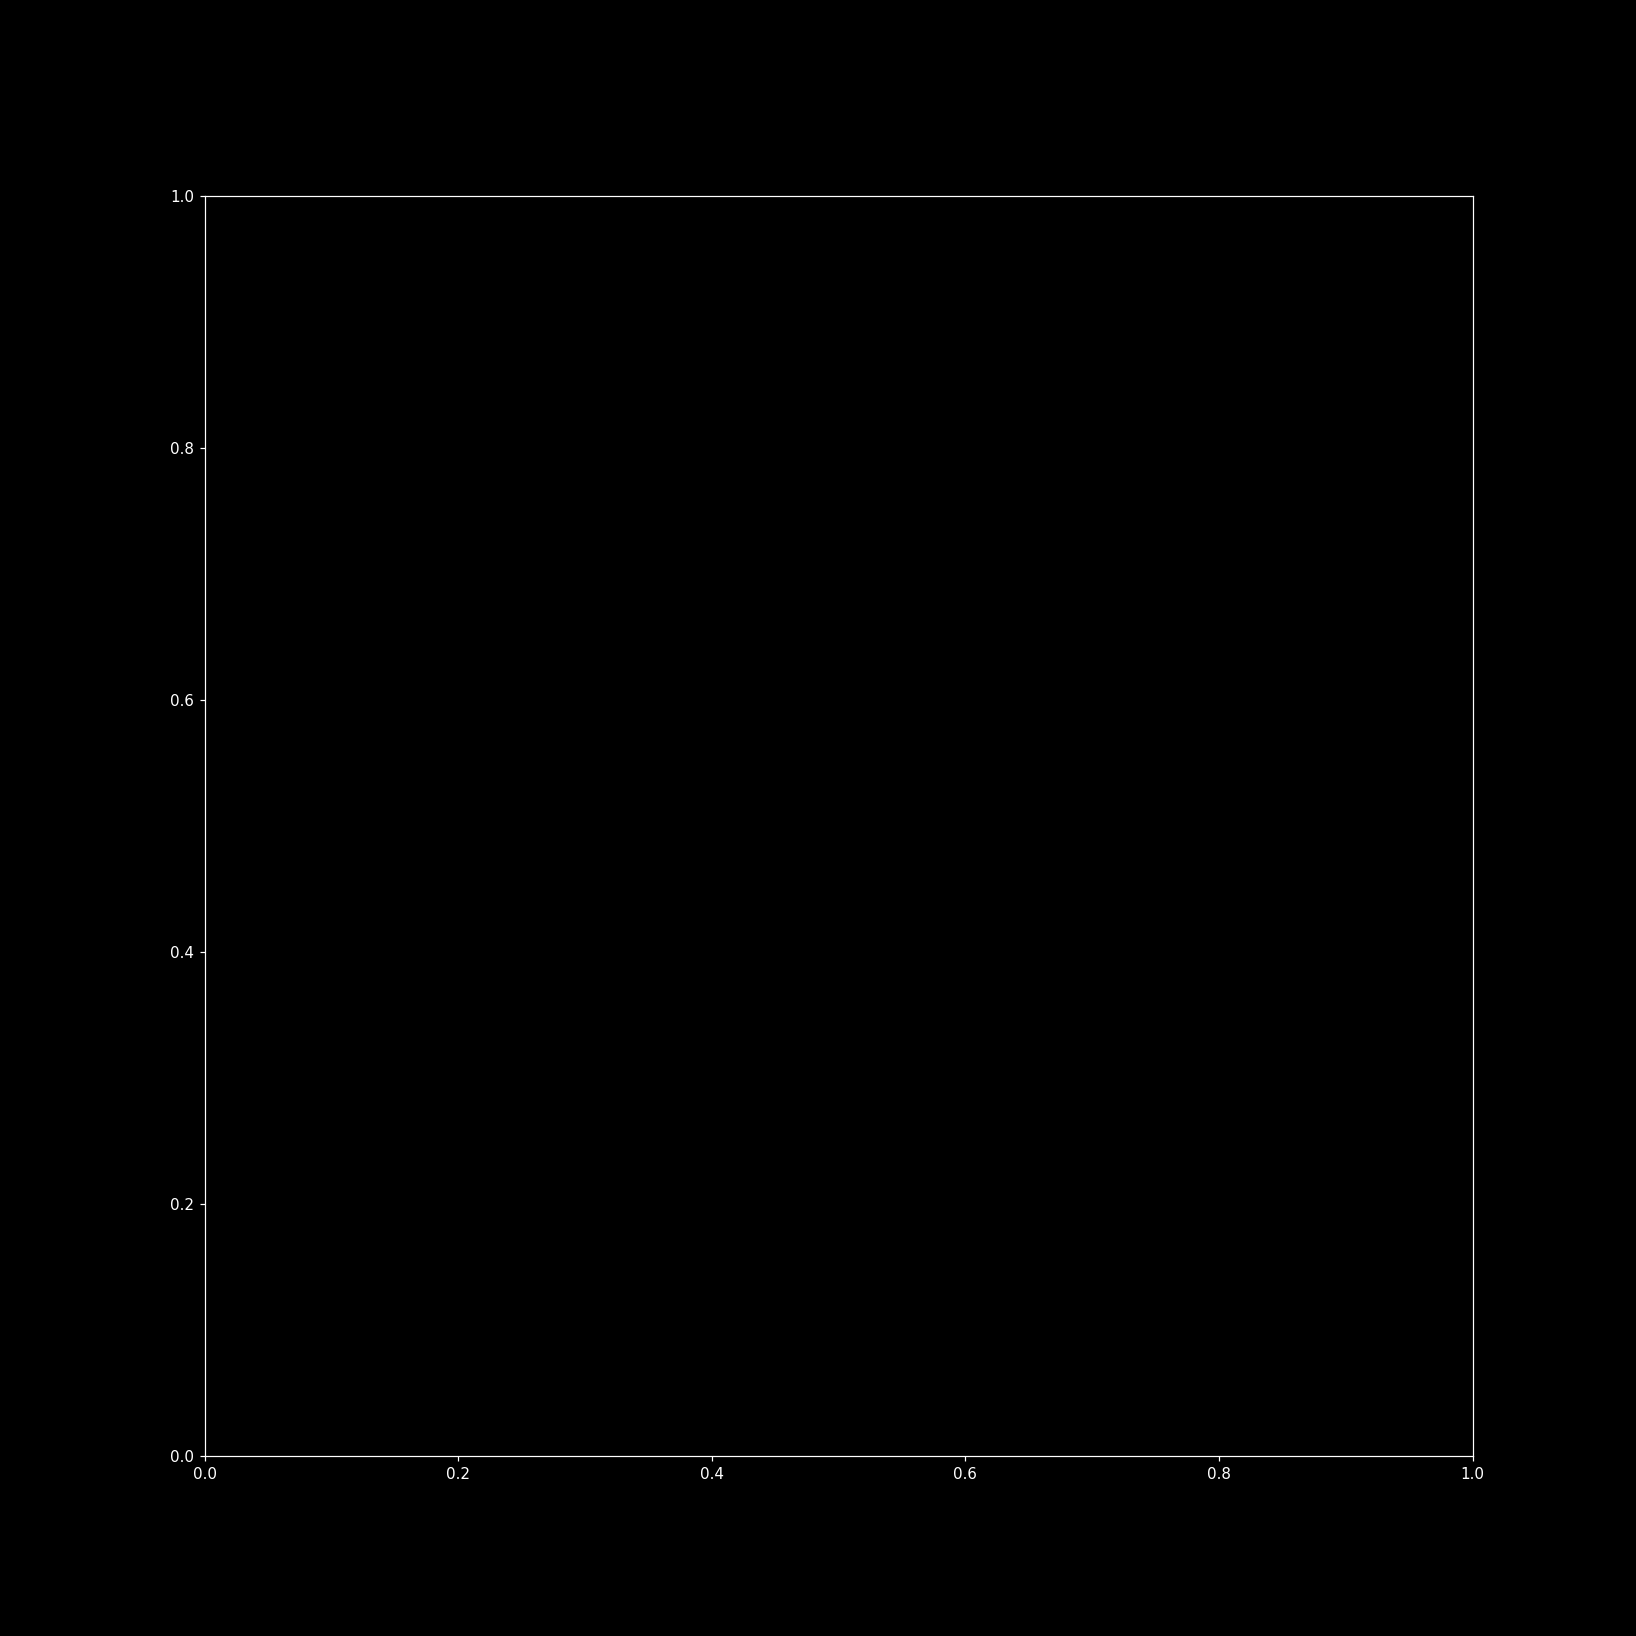

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0          Vascular Smooth Muscle
5          Vascular Smooth Muscle
10         Vascular Smooth Muscle
15         Vascular Smooth Muscle
20         Vascular Smooth Muscle
                    ...          
1802565                 Pericytes
1802570                 Pericytes
1802575                 Pericytes
1802580                 Pericytes
1802585                 Pericytes
Name: celltype, Length: 360518, dtype: category
Categories (27, object): ['Astrocyte Gfap', 'Astrocyte Mfge8', 'C. Plexus', 'Endothelial', ..., 'Pyramidal L4', 'Pyramidal L5', 'Pyramidal L6', 'Vascular Smooth Muscle']

In [13]:
plt.figure(figsize=(15,15))
plt.scatter(*sdata.graph._umap.T, c=sdata.celltype, alpha=0.1, cmap='nipy_spectral')

In [ ]:
[i for i in list(sdata.celltype.unique()) if '' in i]

In [ ]:
# assert False
plt.figure(figsize=(21,13))

plot_celltypes=[ 'Hippocampus','Pyramidal L6']

ax=plt.subplot(121)
sdata.graph.plot_umap(c = -sdata.celltype.isin(plot_celltypes),alpha=0.01,cmap="viridis")


ax=plt.subplot(122)
sdata.scatter(c = -sdata.celltype.isin(plot_celltypes),cmap="viridis",alpha=0.1,axd=ax)